<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Window-functions" data-toc-modified-id="Window-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Window functions</a></span><ul class="toc-item"><li><span><a href="#DataFrame-생성" data-toc-modified-id="DataFrame-생성-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>DataFrame 생성</a></span></li><li><span><a href="#그룹-Window" data-toc-modified-id="그룹-Window-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>그룹 Window</a></span><ul class="toc-item"><li><span><a href="#순위-함수" data-toc-modified-id="순위-함수-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>순위 함수</a></span><ul class="toc-item"><li><span><a href="#rank" data-toc-modified-id="rank-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>rank</a></span></li></ul></li><li><span><a href="#분석-함수" data-toc-modified-id="분석-함수-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>분석 함수</a></span><ul class="toc-item"><li><span><a href="#cume_dist()" data-toc-modified-id="cume_dist()-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>cume_dist()</a></span></li><li><span><a href="#lag" data-toc-modified-id="lag-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>lag</a></span></li><li><span><a href="#lead" data-toc-modified-id="lead-1.2.2.3"><span class="toc-item-num">1.2.2.3&nbsp;&nbsp;</span>lead</a></span></li></ul></li><li><span><a href="#Aggregate-Functions" data-toc-modified-id="Aggregate-Functions-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Aggregate Functions</a></span></li></ul></li></ul></li><li><span><a href="#문제:-zscore,-cdf-계산" data-toc-modified-id="문제:-zscore,-cdf-계산-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>문제: zscore, cdf 계산</a></span><ul class="toc-item"><li><span><a href="#zscore-계산" data-toc-modified-id="zscore-계산-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>zscore 계산</a></span></li><li><span><a href="#cdf-계산" data-toc-modified-id="cdf-계산-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>cdf 계산</a></span></li><li><span><a href="#window-함수를-사용하여-zscore-계산" data-toc-modified-id="window-함수를-사용하여-zscore-계산-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>window 함수를 사용하여 zscore 계산</a></span><ul class="toc-item"><li><span><a href="#컬럼을-만들지-않고-평균,-표준편차-계산" data-toc-modified-id="컬럼을-만들지-않고-평균,-표준편차-계산-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>컬럼을 만들지 않고 평균, 표준편차 계산</a></span></li></ul></li></ul></li><li><span><a href="#추론" data-toc-modified-id="추론-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>추론</a></span><ul class="toc-item"><li><span><a href="#Kolmogorov-Smirnov-검증-(KS-검증)" data-toc-modified-id="Kolmogorov-Smirnov-검증-(KS-검증)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Kolmogorov-Smirnov 검증 (KS 검증)</a></span></li><li><span><a href="#Scipy-Kolmogorov-Smirnov" data-toc-modified-id="Scipy-Kolmogorov-Smirnov-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Scipy Kolmogorov-Smirnov</a></span></li><li><span><a href="#ANOVA" data-toc-modified-id="ANOVA-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ANOVA</a></span><ul class="toc-item"><li><span><a href="#R-스타일-모델링" data-toc-modified-id="R-스타일-모델링-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>R 스타일 모델링</a></span></li><li><span><a href="#ANOVA에-모델-적용" data-toc-modified-id="ANOVA에-모델-적용-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>ANOVA에 모델 적용</a></span></li><li><span><a href="#평균" data-toc-modified-id="평균-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>평균</a></span></li><li><span><a href="#그래프" data-toc-modified-id="그래프-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>그래프</a></span></li><li><span><a href="#fcategory-별-fscore-그래프" data-toc-modified-id="fcategory-별-fscore-그래프-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>fcategory 별 fscore 그래프</a></span></li></ul></li></ul></li><li><span><a href="#빈도-분석" data-toc-modified-id="빈도-분석-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>빈도 분석</a></span></li></ul></div>

In [66]:
# SparkSession 생성
import pyspark
import os

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

## Window functions
- 순위 함수(ranking functions) : rank, dense_rank, precent_rank, ntile, row_number
- 분석 함수(analytic functions) : cum_dist, first_value, last_value, lag, lead
- 집합 함수(aggregate functions) : sum, avg, min ,max, count

In [2]:
marks=[
    "김하나, English, 100",
    "김하나, Math, 80",
    "임하나, English, 70",
    "임하나, Math, 100",
    "김갑돌, English, 82.3",
    "김갑돌, Math, 98.5"
]

### DataFrame 생성

In [3]:
_marksRdd=spark.sparkContext.parallelize(marks).map(lambda x:x.split(','))

In [4]:
_marksDf=spark.createDataFrame(_marksRdd, schema=["name", "subject", "mark"])
_marksDf.printSchema()
_marksDf.show()

root
 |-- name: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- mark: string (nullable = true)

+------+--------+-----+
|  name| subject| mark|
+------+--------+-----+
|김하나| English|  100|
|김하나|    Math|   80|
|임하나| English|   70|
|임하나|    Math|  100|
|김갑돌| English| 82.3|
|김갑돌|    Math| 98.5|
+------+--------+-----+



In [5]:
_marksDf.groupBy('subject').count().show()

+--------+-----+
| subject|count|
+--------+-----+
|    Math|    3|
| English|    3|
+--------+-----+



### 그룹 Window
- 1. partitionBy : 컬럼별로 구분
- 2. orderBy : 순서대로 정렬
- 3. frame : 현재 행을 기준으로 행 분할

subject를 컬럼별로 나누어 과목별로 윈도우가 나누어지면 mark 순으로 정렬함

In [6]:
from pyspark.sql.window import Window

win = Window.partitionBy("subject").orderBy("mark")

#### 순위 함수
- row_number
- over(win)은 win안에있는 윈도우 안에서만 행번호를 매김

In [7]:
from pyspark.sql.functions import row_number

_marksDf.withColumn("row_number", row_number().over(win)).show()

+------+--------+-----+----------+
|  name| subject| mark|row_number|
+------+--------+-----+----------+
|임하나|    Math|  100|         1|
|김하나|    Math|   80|         2|
|김갑돌|    Math| 98.5|         3|
|김하나| English|  100|         1|
|임하나| English|   70|         2|
|김갑돌| English| 82.3|         3|
+------+--------+-----+----------+



mark가 string 타입임으로 float 타입으로 바꿔준다

In [8]:
from pyspark.sql.types import FloatType

_marksDf = _marksDf.withColumn('markF', _marksDf['mark'].cast(FloatType()))

In [9]:
winF = Window.partitionBy("subject").orderBy("markF")

from pyspark.sql import functions as F
# winF = Window.partitionBy("subject").orderBy(F.col("markF").desc()) 
# 교제에는 이렇게 돼있음

In [10]:
from pyspark.sql.functions import row_number

_marksDf.withColumn("row_number", row_number().over(winF)).show()

+------+--------+-----+-----+----------+
|  name| subject| mark|markF|row_number|
+------+--------+-----+-----+----------+
|김하나|    Math|   80| 80.0|         1|
|김갑돌|    Math| 98.5| 98.5|         2|
|임하나|    Math|  100|100.0|         3|
|임하나| English|   70| 70.0|         1|
|김갑돌| English| 82.3| 82.3|         2|
|김하나| English|  100|100.0|         3|
+------+--------+-----+-----+----------+



##### rank
각 그룹별로 등위

In [11]:
from pyspark.sql.functions import rank

_marksDf.withColumn("rank", rank().over(winF)).show()

+------+--------+-----+-----+----+
|  name| subject| mark|markF|rank|
+------+--------+-----+-----+----+
|김하나|    Math|   80| 80.0|   1|
|김갑돌|    Math| 98.5| 98.5|   2|
|임하나|    Math|  100|100.0|   3|
|임하나| English|   70| 70.0|   1|
|김갑돌| English| 82.3| 82.3|   2|
|김하나| English|  100|100.0|   3|
+------+--------+-----+-----+----+



#### 분석 함수

##### cume_dist()
누적 함수

In [12]:
from pyspark.sql.functions import cume_dist

_marksDf.withColumn("cume_dist", cume_dist().over(winF)).show()

+------+--------+-----+-----+------------------+
|  name| subject| mark|markF|         cume_dist|
+------+--------+-----+-----+------------------+
|김하나|    Math|   80| 80.0|0.3333333333333333|
|김갑돌|    Math| 98.5| 98.5|0.6666666666666666|
|임하나|    Math|  100|100.0|               1.0|
|임하나| English|   70| 70.0|0.3333333333333333|
|김갑돌| English| 82.3| 82.3|0.6666666666666666|
|김하나| English|  100|100.0|               1.0|
+------+--------+-----+-----+------------------+



##### lag
1개만큼 뒤로 미룬다

In [13]:
from pyspark.sql.functions import lag

_marksDf.withColumn("lag", lag('mark', 1).over(winF)).show()

+------+--------+-----+-----+-----+
|  name| subject| mark|markF|  lag|
+------+--------+-----+-----+-----+
|김하나|    Math|   80| 80.0| null|
|김갑돌|    Math| 98.5| 98.5|   80|
|임하나|    Math|  100|100.0| 98.5|
|임하나| English|   70| 70.0| null|
|김갑돌| English| 82.3| 82.3|   70|
|김하나| English|  100|100.0| 82.3|
+------+--------+-----+-----+-----+



##### lead
lag의 반대

In [14]:
from pyspark.sql.functions import lead

_marksDf.withColumn("lag", lead('mark', 1).over(winF)).show()

+------+--------+-----+-----+-----+
|  name| subject| mark|markF|  lag|
+------+--------+-----+-----+-----+
|김하나|    Math|   80| 80.0| 98.5|
|김갑돌|    Math| 98.5| 98.5|  100|
|임하나|    Math|  100|100.0| null|
|임하나| English|   70| 70.0| 82.3|
|김갑돌| English| 82.3| 82.3|  100|
|김하나| English|  100|100.0| null|
+------+--------+-----+-----+-----+



#### Aggregate Functions
과목별로 집합함수

In [15]:
winAgg  = Window.partitionBy("subject")
#orderby는 순서를 매기는게 아니라 안해도 됨

In [16]:
from pyspark.sql import functions as F
_marksDf.withColumn("avg", F.avg(F.col("markF")).over(winAgg))\
    .withColumn("sum", F.sum(F.col("markF")).over(winAgg))\
    .withColumn("min", F.min(F.col("markF")).over(winAgg))\
    .withColumn("max", F.max(F.col("markF")).over(winAgg))\
    .show()

+------+--------+-----+-----+-----------------+-----------------+----+-----+
|  name| subject| mark|markF|              avg|              sum| min|  max|
+------+--------+-----+-----+-----------------+-----------------+----+-----+
|김하나|    Math|   80| 80.0|92.83333333333333|            278.5|80.0|100.0|
|임하나|    Math|  100|100.0|92.83333333333333|            278.5|80.0|100.0|
|김갑돌|    Math| 98.5| 98.5|92.83333333333333|            278.5|80.0|100.0|
|김하나| English|  100|100.0|84.10000101725261|252.3000030517578|70.0|100.0|
|임하나| English|   70| 70.0|84.10000101725261|252.3000030517578|70.0|100.0|
|김갑돌| English| 82.3| 82.3|84.10000101725261|252.3000030517578|70.0|100.0|
+------+--------+-----+-----+-----------------+-----------------+----+-----+



## 문제: zscore, cdf 계산

In [17]:
_marksDf.show()

+------+--------+-----+-----+
|  name| subject| mark|markF|
+------+--------+-----+-----+
|김하나| English|  100|100.0|
|김하나|    Math|   80| 80.0|
|임하나| English|   70| 70.0|
|임하나|    Math|  100|100.0|
|김갑돌| English| 82.3| 82.3|
|김갑돌|    Math| 98.5| 98.5|
+------+--------+-----+-----+



In [18]:
from pyspark.sql import functions as F

_markStats = _marksDf.select(
            F.mean('markF').alias('mean'),
            F.stddev('markF').alias('std')
).collect()

In [19]:
_markStats

[Row(mean=88.46666717529297, std=12.786190172956093)]

In [20]:
meanMark = _markStats[0]['mean']
stdMark = _markStats[0]['std']

In [21]:
meanMark

88.46666717529297

In [22]:
_markStats[0][0]

88.46666717529297

### zscore 계산
- 표준편차에 얼만큼 떨어져 있는지

형변환

In [23]:
from scipy import stats
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType

zscoreUdf = F.udf(lambda x : (x-meanMark)/stdMark, FloatType())

In [24]:
_marksDf = _marksDf.withColumn("zscore", zscoreUdf(_marksDf['markF']))

In [25]:
_marksDf.show()

+------+--------+-----+-----+-----------+
|  name| subject| mark|markF|     zscore|
+------+--------+-----+-----+-----------+
|김하나| English|  100|100.0|  0.9020148|
|김하나|    Math|   80| 80.0| -0.6621728|
|임하나| English|   70| 70.0| -1.4442666|
|임하나|    Math|  100|100.0|  0.9020148|
|김갑돌| English| 82.3| 82.3|-0.48229098|
|김갑돌|    Math| 98.5| 98.5| 0.78470075|
+------+--------+-----+-----+-----------+



### cdf 계산

In [26]:
from scipy.stats import norm
import pyspark.sql.functions as F

normCdf = F.udf(lambda x: float(norm.cdf(x)))

평균=0, 표준편차=1을 기본 값으로 누적확률을 계산하기 때문에 범위초과로 1.0이 계산

In [27]:
_marksDf.withColumn("cdf", normCdf(_marksDf['markF'])).show()

+------+--------+-----+-----+-----------+---+
|  name| subject| mark|markF|     zscore|cdf|
+------+--------+-----+-----+-----------+---+
|김하나| English|  100|100.0|  0.9020148|1.0|
|김하나|    Math|   80| 80.0| -0.6621728|1.0|
|임하나| English|   70| 70.0| -1.4442666|1.0|
|임하나|    Math|  100|100.0|  0.9020148|1.0|
|김갑돌| English| 82.3| 82.3|-0.48229098|1.0|
|김갑돌|    Math| 98.5| 98.5| 0.78470075|1.0|
+------+--------+-----+-----+-----------+---+



In [28]:
_marksDf = _marksDf.withColumn("cdf", normCdf(_marksDf['zscore']))

In [29]:
_marksDf.show()

+------+--------+-----+-----+-----------+-------------------+
|  name| subject| mark|markF|     zscore|                cdf|
+------+--------+-----+-----+-----------+-------------------+
|김하나| English|  100|100.0|  0.9020148| 0.8164754981807292|
|김하나|    Math|   80| 80.0| -0.6621728| 0.2539302463290559|
|임하나| English|   70| 70.0| -1.4442666| 0.0743320011235712|
|임하나|    Math|  100|100.0|  0.9020148| 0.8164754981807292|
|김갑돌| English| 82.3| 82.3|-0.48229098|0.31479962882028223|
|김갑돌|    Math| 98.5| 98.5| 0.78470075| 0.7836854740814176|
+------+--------+-----+-----+-----------+-------------------+



### window 함수를 사용하여 zscore 계산

모든 행으로 전체 윈도우 만들기

In [30]:
import sys

byAll = Window.rowsBetween(-sys.maxsize, sys.maxsize)

In [31]:
from pyspark.sql import functions as F
_marksDf = _marksDf.withColumn("mean", F.avg(_marksDf['markF']).over(byAll))

In [32]:
_marksDf = _marksDf.withColumn("stddev", F.stddev(_marksDf['markF']).over(byAll))

In [33]:
from pyspark.sql.window import Window

bySubject = Window.partitionBy('subject')
_marksDf = _marksDf.withColumn("meanBySubject", F.avg(_marksDf['markF']).over(bySubject))

`_marksDf.count()` 모든행 출력

In [34]:
_marksDf.show(_marksDf.count(), truncate=False)

+------+--------+-----+-----+-----------+-------------------+-----------------+------------------+-----------------+
|name  |subject |mark |markF|zscore     |cdf                |mean             |stddev            |meanBySubject    |
+------+--------+-----+-----+-----------+-------------------+-----------------+------------------+-----------------+
|김하나| English| 100 |100.0|0.9020148  |0.8164754981807292 |88.46666717529297|12.786190172956093|84.10000101725261|
|임하나| English| 70  |70.0 |-1.4442666 |0.0743320011235712 |88.46666717529297|12.786190172956093|84.10000101725261|
|김갑돌| English| 82.3|82.3 |-0.48229098|0.31479962882028223|88.46666717529297|12.786190172956093|84.10000101725261|
|김하나| Math   | 80  |80.0 |-0.6621728 |0.2539302463290559 |88.46666717529297|12.786190172956093|92.83333333333333|
|임하나| Math   | 100 |100.0|0.9020148  |0.8164754981807292 |88.46666717529297|12.786190172956093|92.83333333333333|
|김갑돌| Math   | 98.5|98.5 |0.78470075 |0.7836854740814176 |88.46666717529297|12.

In [35]:
_marksDf = _marksDf.withColumn("zscore1", (F.col('markF')-F.col('mean'))/F.col('stddev'))

부분만 출력

In [36]:
_marksDf.select('zscore', 'zscore1').show(_marksDf.count())

+-----------+-------------------+
|     zscore|            zscore1|
+-----------+-------------------+
|  0.9020148|  0.902014804151829|
| -0.6621728| -0.662172786480269|
| -1.4442666| -1.444266581796318|
|  0.9020148|  0.902014804151829|
|-0.48229098|-0.4822909748814927|
| 0.78470075| 0.7847007348544217|
+-----------+-------------------+



#### 컬럼을 만들지 않고 평균, 표준편차 계산

In [37]:
_marksDf = _marksDf.withColumn("zscore2", (F.col('markF')-F.avg('markF').over(byAll))/F.stddev('markF').over(byAll))

In [38]:
_marksDf.select('zscore', 'zscore1', 'zscore2').show()

+-----------+-------------------+-------------------+
|     zscore|            zscore1|            zscore2|
+-----------+-------------------+-------------------+
|  0.9020148|  0.902014804151829|  0.902014804151829|
| -0.6621728| -0.662172786480269| -0.662172786480269|
| -1.4442666| -1.444266581796318| -1.444266581796318|
|  0.9020148|  0.902014804151829|  0.902014804151829|
|-0.48229098|-0.4822909748814927|-0.4822909748814927|
| 0.78470075| 0.7847007348544217| 0.7847007348544217|
+-----------+-------------------+-------------------+



## 추론

### Kolmogorov-Smirnov 검증 (KS 검증)
spark 필요

In [39]:
xRdd = spark.sparkContext.parallelize([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5])

In [40]:
from pyspark.mllib.stat import Statistics

testResult = Statistics.kolmogorovSmirnovTest(xRdd, "norm")

In [41]:
print(testResult)

Kolmogorov-Smirnov test summary:
degrees of freedom = 0 
statistic = 0.841344746068543 
pValue = 5.06089025353873E-6 
Very strong presumption against null hypothesis: Sample follows theoretical distribution.


### Scipy Kolmogorov-Smirnov

In [42]:
from scipy.stats import kstest

kstest([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5], 'norm')

KstestResult(statistic=0.8413447460685429, pvalue=5.060890253444183e-06)

집단간의 차이

In [43]:
kstest([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5], [11.0, 12.0, 15.0, 14.0, 13.0, 13.3, 15.5])

KstestResult(statistic=1.0, pvalue=0.0005827505827505828)

In [44]:
kstest([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5], [1.1, 2.1, 5.1, 4.1, 3.1, 3.4, 5.6])

KstestResult(statistic=0.14285714285714285, pvalue=0.9999609537692629)

### ANOVA
표준편차의 차이

p<0.005 이면 차이가 있다 : 유의미

In [47]:
import statsmodels.api as sm

moore=sm.datasets.get_rdataset("Moore","carData")

In [48]:
moore.data.head()

,partner.status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


In [49]:
moore.data.columns=['status','conformity', 'fcategory', 'fscore']
moore.data.columns

Index(['status', 'conformity', 'fcategory', 'fscore'], dtype='object')

#### R 스타일 모델링
- fscore : 종속변수
- statusm fcategory : 연속변수 
파트너의 신분이 높고 낮은지 fcategory가 high, low, medium인지

In [50]:
from statsmodels.formula.api import ols

formula='fscore~C(status)*C(fcategory)'
model=ols(formula, data=moore.data).fit()

#### ANOVA에 모델 적용
선형모델 : anova_lm

In [51]:
from statsmodels.stats.anova import anova_lm

result = anova_lm(model)

In [52]:
result

,df,sum_sq,mean_sq,F,PR(>F)
C(status),1.0,7.932587,7.932587,0.231555,6.330623e-01
C(fcategory),2.0,7561.365635,3780.682818,110.359336,8.768957e-17
C(status):C(fcategory),2.0,29.086807,14.543403,0.424527,6.570656e-01
Residual,39.0,1336.059416,34.257934,NaN,NaN


#### 평균
판다스

In [53]:
moorePd = moore.data

fcategory의 그룹별

In [54]:
moorePd.groupby('fcategory').mean()

,conformity,fscore
fcategory,,
high,12.266667,58.533333
low,11.733333,26.933333
medium,12.400000,43.866667


fcategory의 그룹별의 fscore 변수의 평균만

In [55]:
moorePd.groupby('fcategory')['fscore'].mean()

fcategory
high      58.533333
low       26.933333
medium    43.866667
Name: fscore, dtype: float64

#### 그래프

<AxesSubplot:>

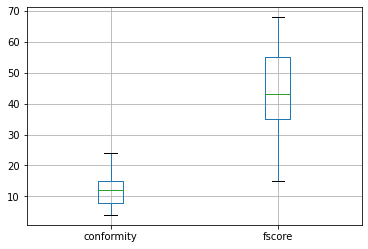

In [56]:
moorePd.boxplot()

#### fcategory 별 fscore 그래프
유의미한 값만 평균값 분석

In [61]:
_fscore = moorePd.groupby('fcategory')['fscore'].mean()

<AxesSubplot:title={'center':'fscore by fcategory'}, xlabel='fcategory'>

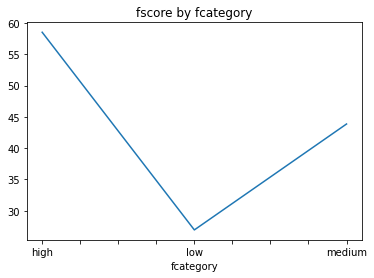

In [62]:
_fscore.plot(x="fcategory", y=_fscore,  title="fscore by fcategory")